# Classical kicked top

The recursion relations obeyed by the classical systemn are
$$X'= \mathrm{Re}[(X \cos p + Z \sin p + i Y) e^{i k (Z \cos p - X \sin p)}]$$
$$Y'= \mathrm{Im}[(X \cos p + Z \sin p + i Y) e^{i k (Z \cos p - X \sin p)}]$$
$$Z'=-X \sin p + Z \cos p$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size']=20
from scipy.optimize import curve_fit

In [2]:
p= np.pi/2
k=5
#k=2 should be mostly regular, 2.5 mixed behaviour, 3 mostly chaotic, 6 fully chaotic
N_points=1000 #Number of random initial pairs of points to average (d(t) plot) or number of initial points (X-Z plots)
N_steps=100 #Number of time steps

In [3]:
def expon(x, m, a):
    return a*np.exp(m*x)

In [4]:
def F(X, Y, Z, p, k):
    i=complex(0,1)
    aux=(X*np.cos(p)+ Z*np.sin(p)+ i*Y)*np.exp(i*k*(Z*np.cos(p)-X*np.sin(p)))
    X_=np.real(aux)
    Y_=np.imag(aux)
    Z_=-X*np.sin(p)+ Z*np.cos(p)
    return (X_, Y_, Z_)

In [5]:
def Generate_Rand(N_points):
    #Generate random points uniformly on a sphere. 
    #Let a, b be two uniform random numbers on [0,1] then the azimuthal 
    #and polar angles are given by ϕ=2πa, θ=arccos(1-2b)
    a=np.random.rand(N_points)
    b=np.random.rand(N_points)
    ϕ=2*np.pi*a
    θ=np.arccos(1-2*b)
    X=np.sin(θ)*np.cos(ϕ)
    Y=np.sin(θ)*np.sin(ϕ)
    Z=np.cos(θ)
    return (X, Y, Z)
def Generate_Close(epsilon):
    a=np.random.rand(1)
    b=np.random.rand(1)
    c=np.random.rand(1)-0.5
    d=np.random.rand(1)-0.5
    ϕ=2*np.pi*a
    θ=np.arccos(1-2*b)
    X_=np.zeros(2)
    Y_=np.zeros(2)
    Z_=np.zeros(2)
    X_[0]=np.sin(θ)*np.cos(ϕ)
    Y_[0]=np.sin(θ)*np.sin(ϕ)
    Z_[0]=np.cos(θ)   
    X_[1]=np.sin(θ+epsilon*c)*np.cos(ϕ+epsilon*d)
    Y_[1]=np.sin(θ+epsilon*c)*np.sin(ϕ+epsilon*d)
    Z_[1]=np.cos(θ+epsilon*c) 
    return (X_, Y_, Z_)

In [6]:
X_ev, Y_ev, Z_ev=Generate_Rand(N_points)
X_p=[]
Y_p=[]
Z_p=[]
X_p.append(X_ev)
Y_p.append(Y_ev)
Z_p.append(Z_ev)
#t_array=np.arange(0, N_steps, 1 )
#d_array=np.zeros(len(t_array))
#aux_d=np.zeros((len(t_array), N_points))
#X, Y, Z=Generate_Close(epsilon)
X_prev=X_ev
Y_prev=Y_ev
Z_prev=Z_ev
for j in range(N_steps):
    auxX_ev, auxY_ev, auxZ_ev=F(X_prev, Y_prev, Z_prev, p, k)
    #aux_d[j, k]=np.sqrt((auxX[0]-auxX[1])**2+(auxY[0]-auxY[1])**2+(auxZ[0]-auxZ[1])**2)
    X_p.append(auxX_ev)
    Y_p.append(auxY_ev)
    Z_p.append(auxZ_ev)
    X_prev=np.copy(auxX_ev)
    Y_prev=np.copy(auxY_ev)
    Z_prev=np.copy(auxZ_ev)       
#d_array=np.mean(aux_d, axis=1)
X_p=np.asarray(X_p)
Y_p=np.asarray(Y_p)
Z_p=np.asarray(Z_p)

In [7]:
epsilon=1e-15
t_array=np.arange(0, N_steps, 1 )
d_array=np.zeros(len(t_array))
aux_d=np.zeros((len(t_array), N_points))
initial_points=np.zeros((N_points, 3))
X1T=[]
X2T=[]
Y1T=[]
Y2T=[]
Z1T=[]
Z2T=[]
for k_loop in range(N_points):
    X, Y, Z=Generate_Close(epsilon)
    initial_points[k_loop, 0]=X[0]
    initial_points[k_loop, 1]=Y[0]
    initial_points[k_loop, 2]=Z[0]
    X_prev=X
    Y_prev=Y
    Z_prev=Z
    X1=[]
    X2=[]
    Y1=[]
    Y2=[]
    Z1=[]
    Z2=[]
    for j in range(N_steps):
        auxX, auxY, auxZ=F(X_prev, Y_prev, Z_prev, p, k)
        aux_d[j, k_loop]=np.sqrt((auxX[0]-auxX[1])**2+(auxY[0]-auxY[1])**2+(auxZ[0]-auxZ[1])**2)
        X1.append(auxX[0])
        Y1.append(auxY[0])
        Z1.append(auxZ[0])
        X2.append(auxX[1])
        Y2.append(auxY[1])
        Z2.append(auxZ[1])
        X_prev=np.copy(auxX)
        Y_prev=np.copy(auxY)
        Z_prev=np.copy(auxZ)  
    X1T.append(X1)
    Y1T.append(Y1)
    Z1T.append(Z1)
    X2T.append(X2)
    Y2T.append(Y2)
    Z2T.append(Z2)
d_array=np.mean(aux_d, axis=1)
sigma_array=np.std(aux_d, axis=1)
X1T=np.asarray(X1T)
Y1T=np.asarray(Y1T)
Z1T=np.asarray(Z1T)
X2T=np.asarray(X2T)
Y2T=np.asarray(Y2T)
Z2T=np.asarray(Z2T)

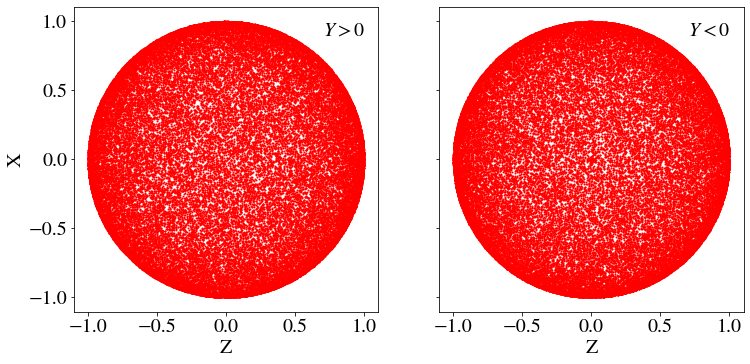

In [8]:
#X-Z plots
theta_y=0.95
phi_y=np.pi/4
X_plot=np.sin(theta_y)*np.cos(phi_y)
Y_plot=np.sin(theta_y)*np.sin(phi_y)
Z_plot=np.cos(theta_y)
aux=[-1, 1]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=[12, 6])
#ax=fig.add_subplot(111)
ax1.scatter(Z_p[Y_p>0], X_p[Y_p>0], s=1, color='red')
ax2.scatter(Z_p[Y_p<0], X_p[Y_p<0], s=1, color='red')
"""if Y_plot>0:
    ax1.scatter(Z_plot, X_plot, s=20, color='purple')
else:
    ax2.scatter(Z_plot, X_plot, s=20, color='purple')
plt.plot(aux, aux)"""
#ax1.scatter(initial_points[:,2][initial_points[:,1]>0], initial_points[:,0][initial_points[:,1]>0], s=10, color='blue')
#ax2.scatter(initial_points[:,2][initial_points[:,1]<0], initial_points[:,0][initial_points[:,1]<0], s=10, color='blue')
#Plot the two diverging trajectories, useful for debugging
"""k_path=90
X1P=X1T[k_path,:]
Y1P=Y1T[k_path,:]
Z1P=Z1T[k_path,:]
X2P=X2T[k_path,:]
Y2P=Y2T[k_path,:]
Z2P=Z2T[k_path,:]
ax1.scatter(Z1P[Y1P>0],X1P[Y1P>0],s=10, color='black')
ax2.scatter(Z1P[Y1P<0],X1P[Y1P<0],s=10, color='black')
ax1.scatter(Z2P[Y2P>0],X2P[Y2P>0],s=10, color='purple')
ax2.scatter(Z2P[Y2P<0],X2P[Y2P<0],s=10, color='purple')"""
#ax1.scatter(auxZ[auxY>0], auxX[auxY>0], s=2, label="Y>0 hemisphere")
#ax2.scatter(auxZ[auxY<0], auxX[auxY<0], s=2, label="Y<0 hemisphere")
ax1.set_xlabel("Z")
ax2.set_xlabel("Z")
ax1.set_ylabel("X")
ax1.axis('square')
ax2.axis('square')
ax1.text(0.7, 0.9, r"$Y>0$")
ax2.text(0.7, 0.9, r"$Y<0$")
#ax1.text(-1.6, 1, "(d)")
plt.show()

In [9]:
cutoff=1/np.exp(3)
#sigma_cutoff=1e-5
#t_array=t_array[sigma_array>sigma_cutoff]
#d_array=d_array[sigma_array>sigma_cutoff]
#sigma_array=sigma_array[sigma_array>sigma_cutoff]
popt, pcov=curve_fit(expon, t_array[d_array<cutoff], d_array[d_array<cutoff], p0=[0,0], sigma=sigma_array[d_array<cutoff])
#popt, pcov=curve_fit(linear, t_array[d_array<cutoff], np.log(d_array[d_array<cutoff]), p0=[1,0])
print("λ=%.3f" % popt[0])
print("σ_λ=%.3f" % np.sqrt(pcov[0,0]))

λ=1.035
σ_λ=0.003


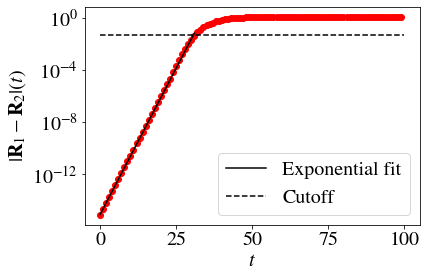

In [10]:
#Lyapunov exponent plots
plt.figure()
#plt.plot(t_array, aux_d[:, k_path])
#plt.plot(t_array, np.sqrt((X1P-X2P)**2+(Y1P-Y2P)**2+(Z1P-Z2P)**2))
t_fit=t_array[d_array<cutoff]
plt.scatter(t_array, d_array, color='red')
plt.plot(t_fit, expon(t_fit, popt[0], popt[1]), color='black', label='Exponential fit')
#plt.fill_between(t_fit, expon(t_fit, popt[0]-np.sqrt(pcov[0,0]), popt[1]-np.sqrt(pcov[1,1])),expon(t_fit, popt[0]+np.sqrt(pcov[0,0]), popt[1]+np.sqrt(pcov[1,1])))
#plt.plot(t_fit, expon(t_fit, popt[0]+np.sqrt(pcov[0,0]), popt[1]+np.sqrt(pcov[1,1])))
#plt.plot(t_fit, expon(t_fit, popt[0]-np.sqrt(pcov[0,0]), popt[1]-np.sqrt(pcov[1,1])))
plt.hlines(cutoff, 0, N_steps, ls='--', label='Cutoff')
#plt.errorbar(t_array, d_array, yerr=sigma_array, capsize=1)
plt.yscale('log')
plt.ylabel(r"$|\mathbf{R}_1-\mathbf{R}_2|(t)$")
plt.xlabel("$t$")
plt.legend()
plt.show()

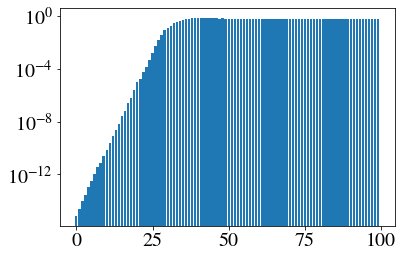

In [11]:
plt.figure()
plt.bar(t_array, sigma_array)
plt.yscale('log')
plt.show()